In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

In [2]:
df = pd.read_csv("fcc-forum-pageviews.csv")

In [3]:
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [5]:
df['date'] = pd.to_datetime(df['date'])
df['date']

0      2016-05-09
1      2016-05-10
2      2016-05-11
3      2016-05-12
4      2016-05-13
          ...    
1299   2019-11-29
1300   2019-11-30
1301   2019-12-01
1302   2019-12-02
1303   2019-12-03
Name: date, Length: 1304, dtype: datetime64[ns]

In [6]:
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [7]:
# Setando Data como index
df.set_index('date', inplace=True)
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [8]:
df.loc['2016-05-09']

value    1201
Name: 2016-05-09 00:00:00, dtype: int64

In [9]:
df.iloc[0]

value    1201
Name: 2016-05-09 00:00:00, dtype: int64

In [10]:
df.shape

(1304, 1)

In [11]:
df = df[(df['value'] > df['value'].quantile(0.025)) &
        (df['value'] < df['value'].quantile(0.975))]

In [12]:
df.shape

(1238, 1)

In [13]:
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


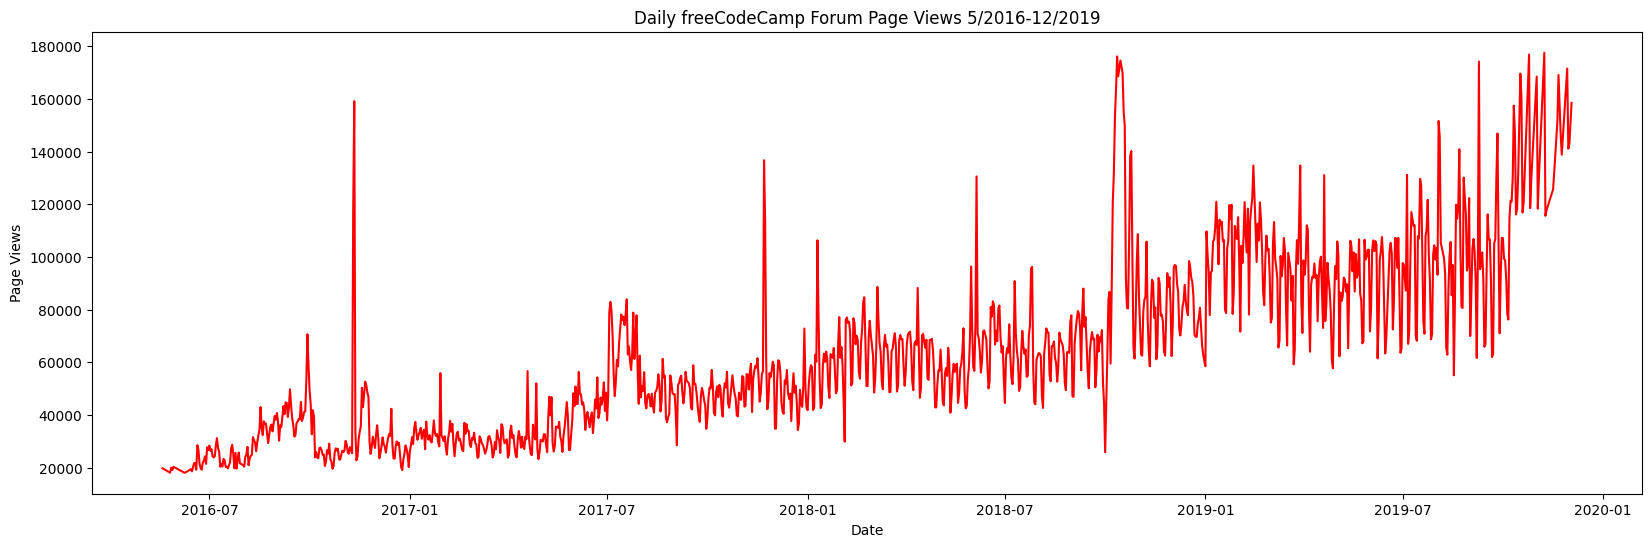

In [77]:
# Definindo figure e axis
fig, ax = plt.subplots(figsize=(20, 6))

# Definindo o título do plot
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

# Definindo as labels
plt.xlabel('Date')
plt.ylabel('Page Views')

# Plotando o line chart
plt.plot(df.index, df['value'], color='r', label='date')
plt.show()

In [78]:
type(fig)

matplotlib.figure.Figure

In [15]:
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [84]:
# Criar colunas 'year' e 'month'
df_bar = df.copy()
df_bar['year'] = df.index.year
df_bar['month'] = df.index.month
df_bar.head()

,value,year,month
date,,,
2016-05-19,19736,2016,5
2016-05-26,18060,2016,5
2016-05-27,19997,2016,5
2016-05-28,19044,2016,5
2016-05-29,20325,2016,5


In [18]:
# Agrupar value por ano e por meses
df_grouped = df_bar.groupby(['year', 'month'])['value'].mean().reset_index()

In [19]:
df_grouped.head()

,year,month,value
0,2016,5,19432.400000
1,2016,6,21875.105263
2,2016,7,24109.678571
3,2016,8,31049.193548
4,2016,9,41476.866667


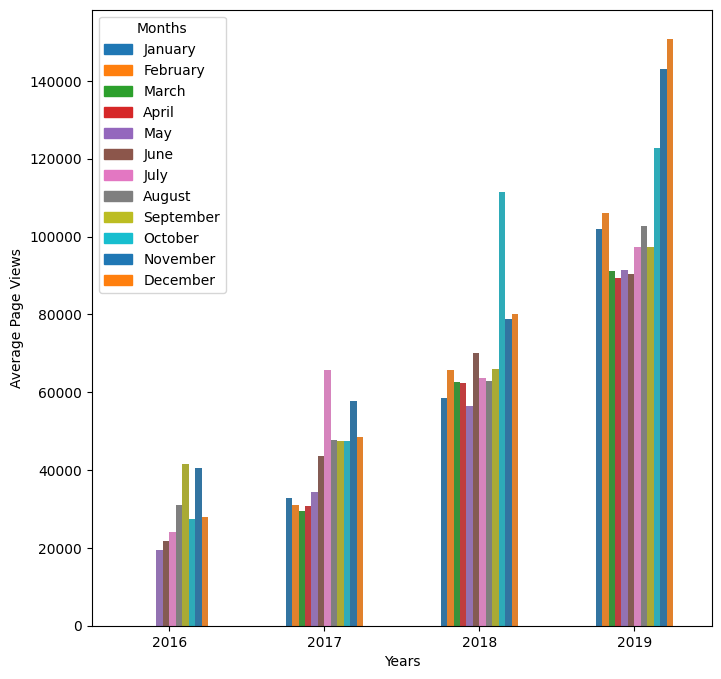

In [82]:
# Definindo figure e axis
fig, ax = plt.subplots(figsize=(8, 8))

# Bar Plot
sns.barplot(x='year', y='value', hue='month', data=df_grouped, palette=sns.color_palette(),
            width=0.5)

# Definindo o desenho e a cor de cada mes na legenda
handles = [plt.Rectangle((0, 0), 1, 1, color=sns.color_palette(n_colors=12)[i]) for i in range(12)]

# Criando array com o nome dos meses para a legenda
legend_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
                 'August', 'September', 'October', 'November', 'December']

# Definindo a legenda
plt.legend(handles, legend_months, title="Months", loc='upper left')

# Definindo os labels
plt.xlabel('Years')
plt.ylabel('Average Page Views')

plt.show()

In [81]:
type(fig)

matplotlib.axes._subplots.AxesSubplot

In [21]:
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [62]:
df_box = df.copy()
df_box.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [63]:
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.month for d in df_box.date]
df_box

,date,value,year,month
0,2016-05-19,19736,2016,5
1,2016-05-26,18060,2016,5
2,2016-05-27,19997,2016,5
3,2016-05-28,19044,2016,5
4,2016-05-29,20325,2016,5
...,...,...,...,...
1233,2019-11-24,138875,2019,11
1234,2019-11-29,171584,2019,11
1235,2019-11-30,141161,2019,11
1236,2019-12-01,142918,2019,12


In [66]:
df_box.sort_values(by='month', inplace=True)
df_box

,date,value,year,month
210,2017-01-06,37353,2017,1
593,2018-01-24,61700,2018,1
592,2018-01-23,62758,2018,1
572,2018-01-03,56013,2018,1
573,2018-01-04,58910,2018,1
...,...,...,...,...
902,2018-12-02,73710,2018,12
901,2018-12-01,62373,2018,12
921,2018-12-21,85083,2018,12
188,2016-12-15,42333,2016,12


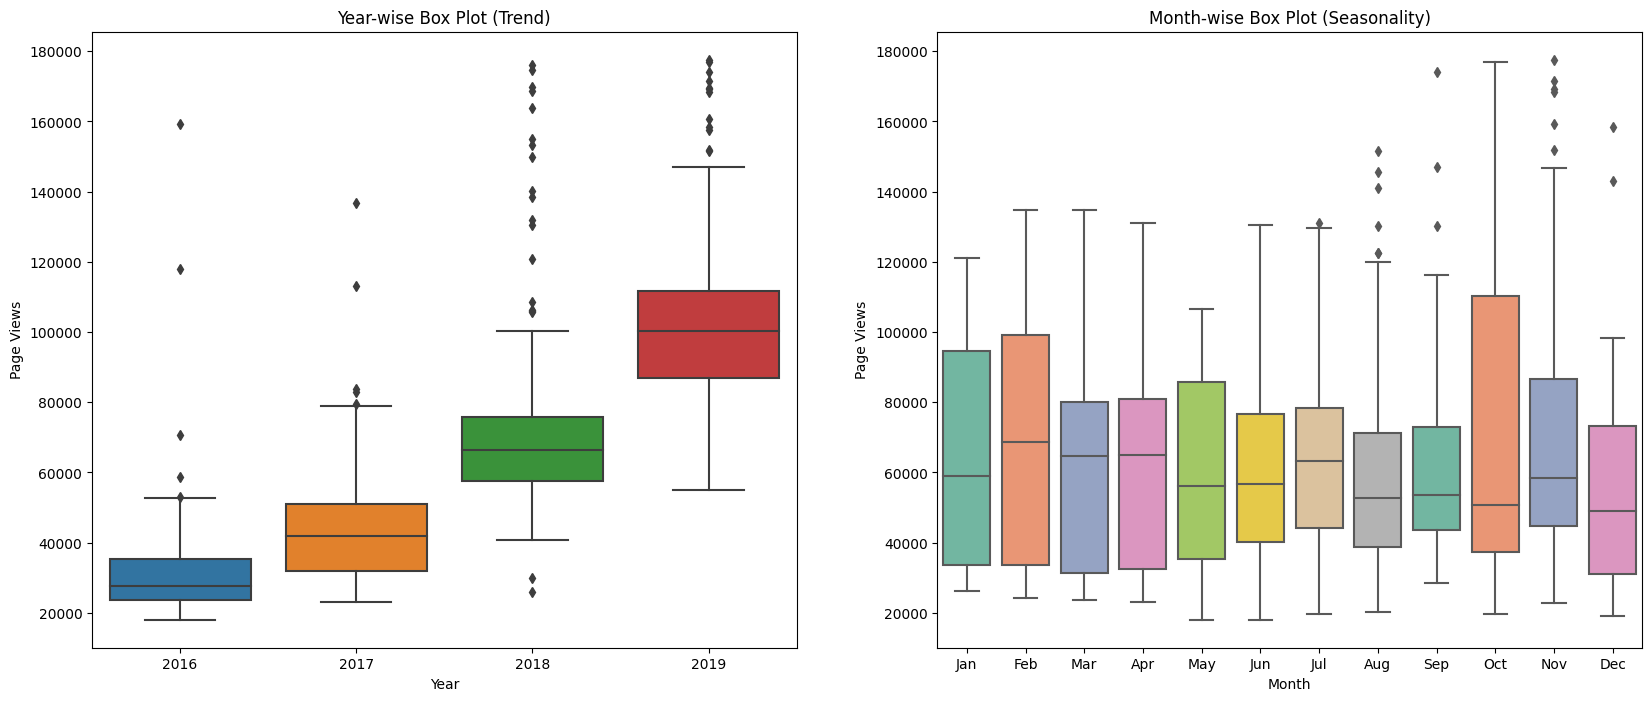

In [72]:
# Definindo figure e axis
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Year wise box plot
sns.boxplot(x='year', y='value', data=df_box, palette=sns.color_palette(), ax=ax[0],)

# Definindo labels e title do primeiro plot
ax[0].set_title('Year-wise Box Plot (Trend)')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Page Views')

# Month wise box plot
sns.boxplot(x='month', y='value', data=df_box, palette=sns.color_palette("Set2"), ax=ax[1])

# Definindo labels e title do segundo plot
ax[1].set_title('Month-wise Box Plot (Seasonality)')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Page Views')

plt.show()
